In [33]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [34]:
#importing training dataset
df = pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/train.csv')
df = df.sample(frac=0.4)

In [35]:
#using songs and members dataset

songs = pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [36]:
#removing null values

df.isnull().sum()/df.isnull().count()*100

msno                       0.000000
song_id                    0.000000
source_system_tab          0.248156
source_screen_name         5.615176
source_type                0.290583
target                     0.000000
song_length                0.001728
genre_ids                  1.601068
artist_name                0.001728
composer                  22.687851
lyricist                  43.067950
language                   0.002135
city                       0.000000
bd                         0.000000
gender                    40.122983
registered_via             0.000000
registration_init_time     0.000000
expiration_date            0.000000
dtype: float64

In [37]:
#removing NA values from df

for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [38]:
# creating a column of registration_init_date  using month, year and day

df.registration_init_time = pd.to_datetime(df.registration_init_time, format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day

# creating expiration date using year, date, month

df.expiration_date = pd.to_datetime(df.expiration_date,  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day


In [39]:
# conversion into categorical values

df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category')

In [40]:
# converting into categorcial values
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# encoding of categorical values
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [41]:
#implementing PCA

import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df[df.columns[df.columns != 'target']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [42]:
# implementing Gaussian model

model = GaussianNB()
model.fit(df[df.columns[df.columns != 'target']], df.target)

GaussianNB(priors=None)

In [43]:
X_array=np.zeros(shape=(len(df)))
len(X_array)

2950967

In [45]:
#K fold cross validation

from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
# 3 is the best split for us
df_val=[]
df_val_target=[]
model = GaussianNB()
for train_indices,val_indices in kf.split(df) :
    model.fit(df.drop(['target'],axis=1).loc[train_indices,:],df.loc[train_indices,'target'])
    X_array=df.loc[val_indices,'target']
    X_array=X_array.append(X_array)


In [46]:
#training accuracy
model.score(df[df.columns[df.columns != 'target']], df.target)

0.55546300585536879

In [47]:
#reading the test file
#same preprocessing as the training dataset
df_test=pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/test.csv')
songs = pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/songs.csv')
df_test = pd.merge(df_test, songs, on='song_id', how='left')
del songs

# Load and join songs data
members = pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/members.csv')
df_test = pd.merge(df_test, members, on='msno', how='left')
del members

df_test.isnull().sum()/df_test.isnull().count()*100

for i in df_test.select_dtypes(include=['object']).columns:
    df_test[i][df_test[i].isnull()] = 'unknown'
df_test = df_test.fillna(value=0)

df_test.registration_init_time = pd.to_datetime(df_test.registration_init_time, format='%Y%m%d', errors='ignore')
df_test['registration_init_time_year'] = df_test['registration_init_time'].dt.year
df_test['registration_init_time_month'] = df_test['registration_init_time'].dt.month
df_test['registration_init_time_day'] = df_test['registration_init_time'].dt.day

df_test.expiration_date = pd.to_datetime(df_test.expiration_date,  format='%Y%m%d', errors='ignore')
df_test['expiration_date_year'] = df_test['expiration_date'].dt.year
df_test['expiration_date_month'] = df_test['expiration_date'].dt.month
df_test['expiration_date_day'] = df_test['expiration_date'].dt.day

df_test['registration_init_time'] = df_test['registration_init_time'].astype('category')
df_test['expiration_date'] = df_test['expiration_date'].astype('category')

for col in df_test.select_dtypes(include=['object']).columns:
    df_test[col] = df_test[col].astype('category')
    
for col in df_test.select_dtypes(include=['category']).columns:
    df_test[col] = df_test[col].cat.codes
    

In [48]:
len(df.columns)

24

In [49]:
len(df_test.columns)

24

In [50]:
# taking predictions from test dataset

predictions = np.zeros(shape=[len(df_test)])
predictions+=model.predict(df_test.drop(['id'],axis=1))

In [51]:
#taking the naive bayes output in csv file known as naive.csv

submission = pd.read_csv('file:///C:/Users/Gandhi/Desktop/MLproject/sample_submission.csv')
submission.target=predictions
submission.to_csv('naive.csv',index=False)

In [52]:
for i in range(0,2556790):
    if predictions[i]==0:
        predictions[i]=0
    else: 
        predictions[i]=1

In [53]:
len(X_array)

1967310

In [54]:
predictions=predictions[0:1967310]

In [55]:
#classification report

from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1']
print(classification_report(X_array,predictions, target_names=target_names))


             precision    recall  f1-score   support

    class 0       0.50      0.59      0.54    977162
    class 1       0.50      0.41      0.45    990148

avg / total       0.50      0.50      0.50   1967310



In [56]:
#hold out validation to plot roc curve

length=df['target'].count()
split = 0.40

test=df[int(length*(1-split)):length]
df=df[0:int(length*(1-split))]

In [57]:
#plotting roc curve

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
X_test = test.drop(['target'], axis=1)
predictions_roc = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(test['target'], predictions_roc)
roc_auc = auc(fpr, tpr)
roc_auc
plt.plot(fpr,tpr)

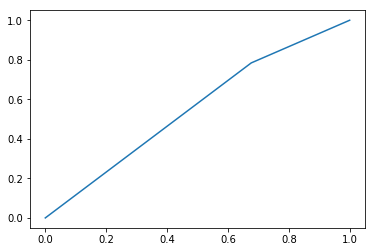

In [58]:
plt.show()

In [59]:
roc_auc

0.55374937703948524